In [1]:
import cv2
import tensorflow as tf
import glob
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# prepare image for input to neural network
def prepare(filepath):
    IMG_SIZE = 50
    img_array = cv2.imread(filepath)
    img_array = img_array/255.0
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [3]:
# Load pre-trained model
model_name = 'models/4-conv-32-nodes-0-dense-1574918090' # FIXME - find better way to select model (ex. always use most recent model)
model = tf.keras.models.load_model(model_name)

In [4]:
# Folder contains subfolders of all Pokemon categories
DATADIR = 'predict/'
CATEGORIES = ['Bulbasaur', 'Charmander', 'Mewtwo', 'Pikachu', 'Squirtle']

# Get filepath of prediction data
folder_path = os.path.join(DATADIR, CATEGORIES[1]) # change index for different Pokemon
img_path = os.path.join(folder_path, os.listdir(folder_path)[0]) # change index for different image
pokemon_name = os.listdir(folder_path)[0].strip('.png.jpg.jpg')

# Read in one image from the filepath
img = cv2.imread(img_path) # rgb colors are read in different order
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

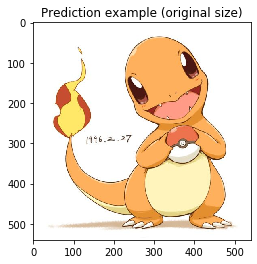

Original Size = (540, 540, 3)


In [5]:
# Plot the original image
plt.title('Prediction example (original size)')
plt.imshow(RGB_img, cmap='gray')
plt.show()
print('Original Size =', RGB_img.shape)

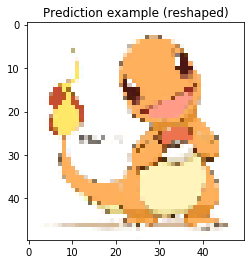

In [6]:
IMG_SIZE = 50

new_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
new_RGB_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)

# Plot the resized image
plt.title('Prediction example (reshaped)')
plt.imshow(new_RGB_img, cmap='gray')
plt.show()

In [7]:
# Model makes a prediction
prediction = model.predict([prepare(img_path)])
prediction_name = CATEGORIES[np.argmax(prediction[0])]
print('Prediction = ' + prediction_name)

# Was it right?
if (prediction_name == pokemon_name):
    print('Correct!')
else:
    print('Incorrect.')

Prediction = Charmander
Correct!
